In [1]:
def print_df(df):
    print(df.to_string(index=False))

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.jleague.co/standings/j1/2024/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
headers = [header.text.strip().replace(' ', '') for header in table.find_all('th')]
rows = []
club_links = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols_text = [col.text.strip() for col in cols]
    cols_text[-1] = '-'.join(cols_text[-1].split()) 
    club_link = row.find('a')['href']
    cols_text.insert(1, f"https://www.jleague.co{club_link}")
    club_links.append(f"https://www.jleague.co{club_link}")
    rows.append(cols_text)

    
headers.insert(1, 'Link')
df = pd.DataFrame(rows, columns=headers)
df.rename(columns={'CLUB': 'Team Name', 'POS' : 'Position', 'FORM' : 'Form', 'PTS' : 'Points'}, inplace=True)
df['Team Name'] = df['Team Name'].replace('Yokohama F･Marinos', 'Yokohama F.Marinos')
print_df(df)


Position                                                     Link                  Team Name  P  W  D  L GF GA  GD Points      Form
       1          https://www.jleague.co/clubs/FC-Machida-Zelvia/          FC Machida Zelvia 23 15  4  4 36 17  19     49 D-D-W-W-W
       2                https://www.jleague.co/clubs/Gamba-Osaka/                Gamba Osaka 23 13  5  5 28 17  11     44 W-D-L-W-W
       3                https://www.jleague.co/clubs/Vissel-Kobe/                Vissel Kobe 23 12  5  6 34 18  16     41 L-D-W-W-D
       4            https://www.jleague.co/clubs/Kashima-Antlers/            Kashima Antlers 23 12  5  6 37 29   8     41 D-D-L-W-L
       5        https://www.jleague.co/clubs/Sanfrecce-Hiroshima/        Sanfrecce Hiroshima 23  9 10  4 39 24  15     37 W-D-D-L-W
       6               https://www.jleague.co/clubs/Cerezo-Osaka/               Cerezo Osaka 23  9 10  4 31 24   7     37 D-W-W-D-D
       7                   https://www.jleague.co/clubs/FC-TOKYO/           

In [3]:
df.dtypes

Position     object
Link         object
Team Name    object
P            object
W            object
D            object
L            object
GF           object
GA           object
GD           object
Points       object
Form         object
dtype: object

In [4]:
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)
df['GD'] = df['GD'].astype(int)
df['Position'] = df['Position'].astype(int)
df['Points'] = df['Points'].astype(int)
df['P'] = df['P'].astype(int)
df['W'] = df['W'].astype(int)
df['D'] = df['D'].astype(int)
df['L'] = df['L'].astype(int)
df['Team Name'] = df['Team Name'].astype(str)
df['Form'] = df['Form'].astype(str)

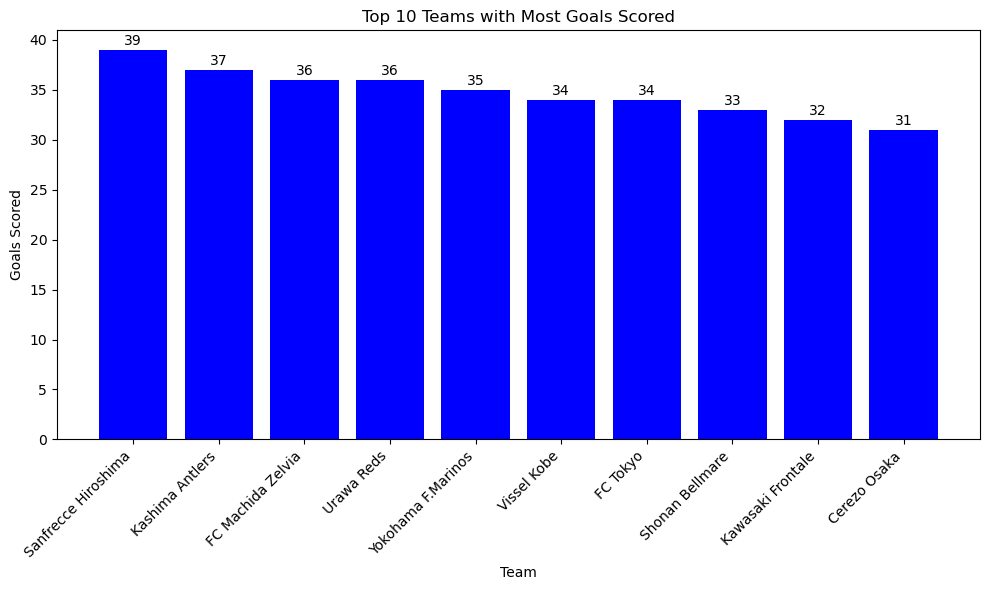

In [5]:
top_scorers = df.sort_values(by='GF', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['Team Name'], top_scorers['GF'], color='blue')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.title('Top 10 Teams with Most Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for index, value in enumerate(top_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center', va='bottom')
plt.show()


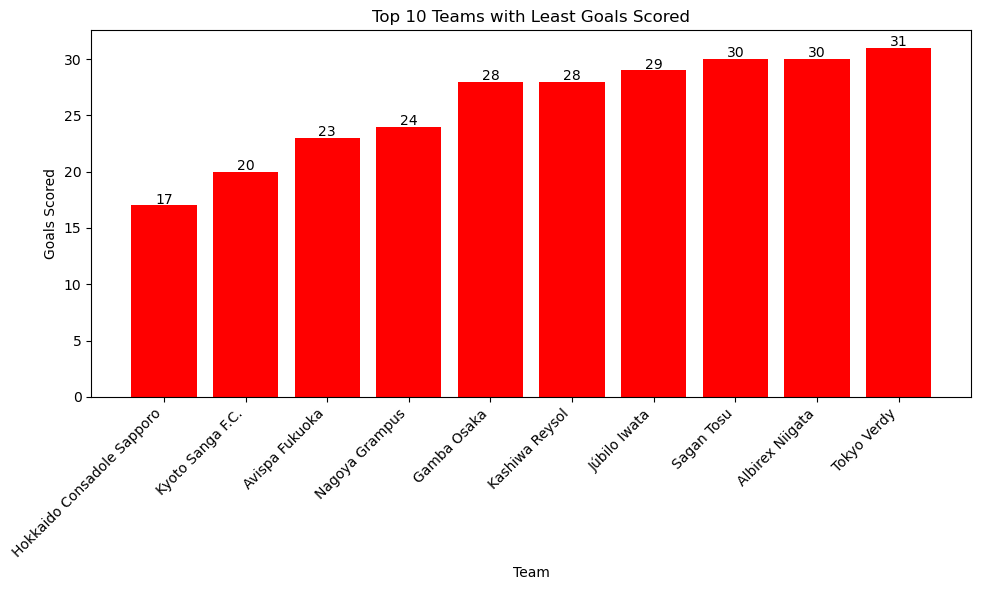

In [6]:
less_scorers = df.sort_values(by='GF', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(less_scorers['Team Name'], less_scorers['GF'], color = 'red')
for index, value in enumerate(less_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Scored')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
grouped = df.groupby('GF')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Scored', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Scored', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Scored  Count of Teams                    Team Names
                 39               1           Sanfrecce Hiroshima
                 37               1               Kashima Antlers
                 36               2 FC Machida Zelvia, Urawa Reds
                 35               1            Yokohama F.Marinos
                 34               2         Vissel Kobe, FC Tokyo
                 33               1               Shonan Bellmare
                 32               1             Kawasaki Frontale
                 31               2     Cerezo Osaka, Tokyo Verdy
                 30               2   Albirex Niigata, Sagan Tosu
                 29               1                  Júbilo Iwata
                 28               2   Gamba Osaka, Kashiwa Reysol
                 24               1                Nagoya Grampus
                 23               1                Avispa Fukuoka
                 20               1              Kyoto Sanga F.C.
          

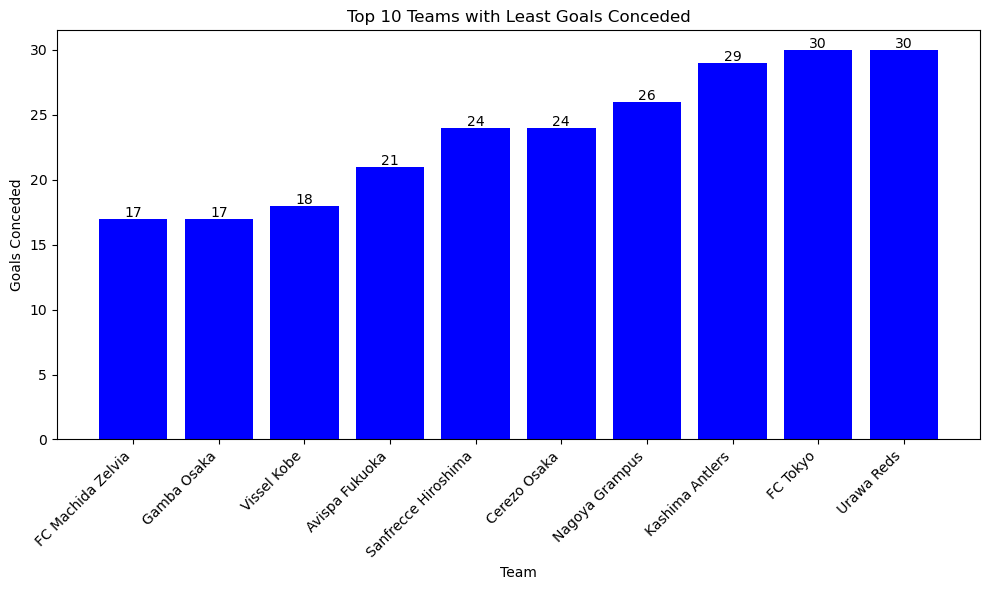

In [8]:
best_defense = df.sort_values(by='GA', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(best_defense['Team Name'], best_defense['GA'], color = 'blue')
for index, value in enumerate(best_defense['GA']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

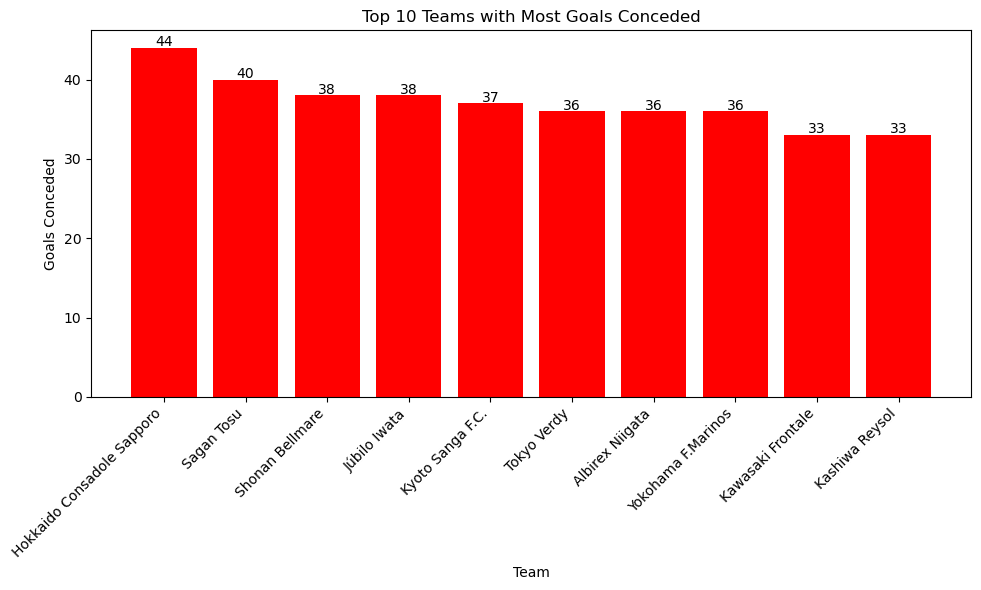

In [9]:
worst_defense = df.sort_values(by='GA', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(worst_defense['Team Name'], worst_defense['GA'], color = 'red')
for index, value in enumerate(worst_defense['GA']):
    plt.text(index, value + 0.2, str(value), ha='center')
plt.title('Top 10 Teams with Most Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
grouped = df.groupby('GA')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Conceded', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Conceded', ascending=True).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Conceded  Count of Teams                                       Team Names
                   17               2                   FC Machida Zelvia, Gamba Osaka
                   18               1                                      Vissel Kobe
                   21               1                                   Avispa Fukuoka
                   24               2                Sanfrecce Hiroshima, Cerezo Osaka
                   26               1                                   Nagoya Grampus
                   29               1                                  Kashima Antlers
                   30               2                             FC Tokyo, Urawa Reds
                   33               2                Kashiwa Reysol, Kawasaki Frontale
                   36               3 Tokyo Verdy, Yokohama F.Marinos, Albirex Niigata
                   37               1                                 Kyoto Sanga F.C.
                   38               2      

In [11]:
def calculate_points(form):
    points = 0
    for result in form.split('-'):
        if result == 'W':
            points += 3
        elif result == 'D':
            points += 1
    return points

df['Points over the last 5 games'] = df['Form'].apply(calculate_points)

l5p = df[['Position','Team Name', 'Points over the last 5 games']].sort_values(by='Points over the last 5 games', ascending=False).reset_index(drop=True)

print_df(l5p)


 Position                  Team Name  Points over the last 5 games
        1          FC Machida Zelvia                            11
        2                Gamba Osaka                            10
        6               Cerezo Osaka                             9
        7                   FC Tokyo                             9
       19           Kyoto Sanga F.C.                             8
        9                 Urawa Reds                             8
        5        Sanfrecce Hiroshima                             8
        3                Vissel Kobe                             8
        8             Avispa Fukuoka                             7
       18            Shonan Bellmare                             7
       10                Tokyo Verdy                             7
       13             Kashiwa Reysol                             7
       17                 Sagan Tosu                             6
        4            Kashima Antlers                          

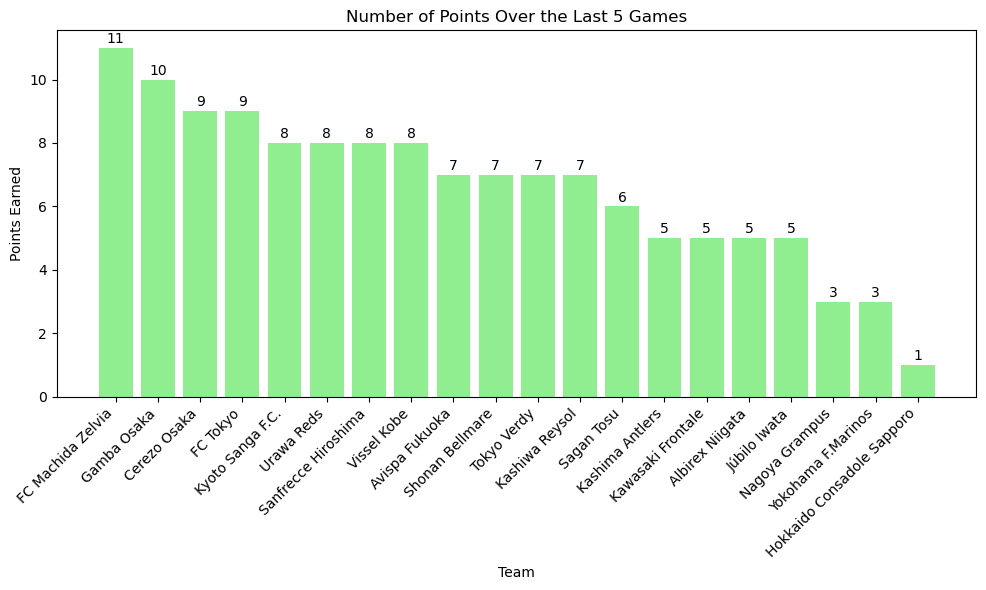

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(l5p['Team Name'], l5p['Points over the last 5 games'], color = 'lightgreen')
for index, value in enumerate(l5p['Points over the last 5 games']):
    plt.text(index,value + 0.15, str(value), ha='center')
plt.title('Number of Points Over the Last 5 Games')
plt.xlabel('Team')
plt.ylabel('Points Earned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

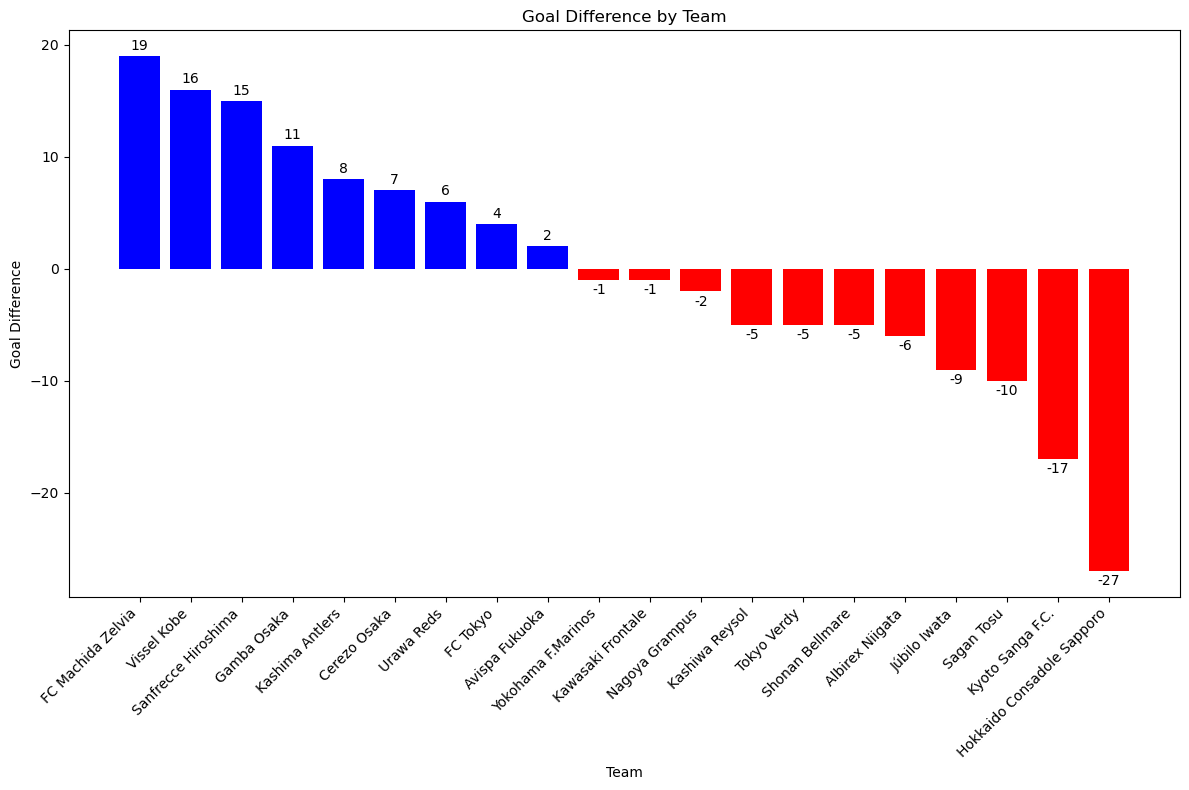

In [13]:
df2 = df.sort_values(by='GD', ascending=False)
colors = ['blue' if val >= 0 else 'red' for val in df2['GD']]
plt.figure(figsize=(12,8))
bars = plt.bar(df2['Team Name'], df2['GD'], color=colors)
for bar, value in zip(bars, df2['GD']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3 if value >= 0 else bar.get_height() - 0.3,
             str(value), ha='center', va='bottom' if value >= 0 else 'top')
plt.title('Goal Difference by Team')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
grouped = df.groupby('GD')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Goal Difference', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Goal Difference', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Goal Difference  Count of Teams                                   Team Names
              19               1                            FC Machida Zelvia
              16               1                                  Vissel Kobe
              15               1                          Sanfrecce Hiroshima
              11               1                                  Gamba Osaka
               8               1                              Kashima Antlers
               7               1                                 Cerezo Osaka
               6               1                                   Urawa Reds
               4               1                                     FC Tokyo
               2               1                               Avispa Fukuoka
              -1               2        Yokohama F.Marinos, Kawasaki Frontale
              -2               1                               Nagoya Grampus
              -5               3 Tokyo Verdy, Kashiwa Reysol, Sh

In [15]:
grouped = df.groupby('Points')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Points', 'Count of Teams', 'Team Names']
grouped = grouped.sort_values(by='Total Points', ascending=False).reset_index(drop=True)
print_df(grouped)

 Total Points  Count of Teams                         Team Names
           49               1                  FC Machida Zelvia
           44               1                        Gamba Osaka
           41               2       Vissel Kobe, Kashima Antlers
           37               2  Sanfrecce Hiroshima, Cerezo Osaka
           36               1                           FC Tokyo
           35               1                     Avispa Fukuoka
           33               1                         Urawa Reds
           31               1                        Tokyo Verdy
           30               1                     Nagoya Grampus
           29               2 Yokohama F.Marinos, Kashiwa Reysol
           25               2 Kawasaki Frontale, Albirex Niigata
           24               1                       Júbilo Iwata
           23               1                         Sagan Tosu
           22               2  Shonan Bellmare, Kyoto Sanga F.C.
           12            

In [16]:
df['Points Per Game'] = df['Points'] / df['P']

df_sorted = df.sort_values(by='Points Per Game', ascending=False)

df_sorted = df_sorted[['Position','Team Name', 'Points Per Game']]

print_df(df_sorted)

 Position                  Team Name  Points Per Game
        1          FC Machida Zelvia         2.130435
        2                Gamba Osaka         1.913043
        3                Vissel Kobe         1.782609
        4            Kashima Antlers         1.782609
        5        Sanfrecce Hiroshima         1.608696
        6               Cerezo Osaka         1.608696
        7                   FC Tokyo         1.565217
        8             Avispa Fukuoka         1.521739
        9                 Urawa Reds         1.434783
       10                Tokyo Verdy         1.347826
       11             Nagoya Grampus         1.304348
       12         Yokohama F.Marinos         1.260870
       13             Kashiwa Reysol         1.260870
       14          Kawasaki Frontale         1.086957
       15            Albirex Niigata         1.086957
       16               Júbilo Iwata         1.043478
       17                 Sagan Tosu         1.000000
       18            Shonan 